In [1]:
# Basic data handling and I/O
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation
from scipy.io import arff
from sklearn.preprocessing import StandardScaler

# Feature selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA

# Model evaluation and splitting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Suppress warnings for clean output (optional)
import warnings
warnings.filterwarnings('ignore')

# Set visual aesthetics for plots (optional)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
# Install necessary libraries if needed
#%pip install scipy pandas

# Load ARFF files using scipy
from scipy.io import arff
import pandas as pd

# Load a specific ARFF file (replace with the correct filename as needed)
data_1year, meta_1year = arff.loadarff('/Users/poojithramagiri/Desktop/ML Challenges/polish+companies+bankruptcy+data/1year.arff')
df_1year = pd.DataFrame(data_1year)

# Convert binary classification column to strings for clarity
df_1year['class'] = df_1year['class'].apply(lambda x: x.decode('utf-8'))

# Check the first few rows
print(df_1year.head())

      Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7    Attr8  \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

    Attr9   Attr10  ...    Attr56   Attr57   Attr58    Attr59  Attr60  Attr61  \
0  1.1389  0.50494  ...  0.121960  0.39718  0.87804  0.001924  8.4160  5.1372   
1  1.6996  0.49788  ...  0.121300  0.42002  0.85300  0.000000  4.1486  3.2732   
2  1.3090  0.30408  ...  0.241140  0.81774  0.76599  0.694840  4.9909  3.9510   
3  1.0571  0.57353  ...  0.054015  0.14207  0.94598  0.000000  4.5746  3.6147   
4  1.1559  0.38677  ...  0.134850  0.48431  0.86515  0.124440  6.3985  4.3158   

    Attr62  Attr63   Attr64  class  
0   82.

In [5]:
df_1year.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [1]:
import plotly.express as px

Top contributing features for PC1:
 Attr13    0.276021
Attr56    0.273158
Attr58    0.273158
Attr20    0.273109
Attr43    0.272511
Attr44    0.272258
Attr30    0.271753
Attr49    0.271011
Attr39    0.265279
Attr42    0.264653
Name: PC1, dtype: float64
Top contributing features for PC2:
 Attr7     0.306704
Attr14    0.306704
Attr18    0.306704
Attr24    0.306530
Attr11    0.304426
Attr22    0.287156
Attr35    0.272160
Attr48    0.261617
Attr38    0.252270
Attr10    0.252247
Name: PC2, dtype: float64
Top contributing features for PC3:
 Attr12    0.356124
Attr16    0.341207
Attr8     0.329287
Attr17    0.327200
Attr26    0.326603
Attr63    0.308425
Attr34    0.291211
Attr50    0.262390
Attr33    0.261315
Attr4     0.205620
Name: PC3, dtype: float64


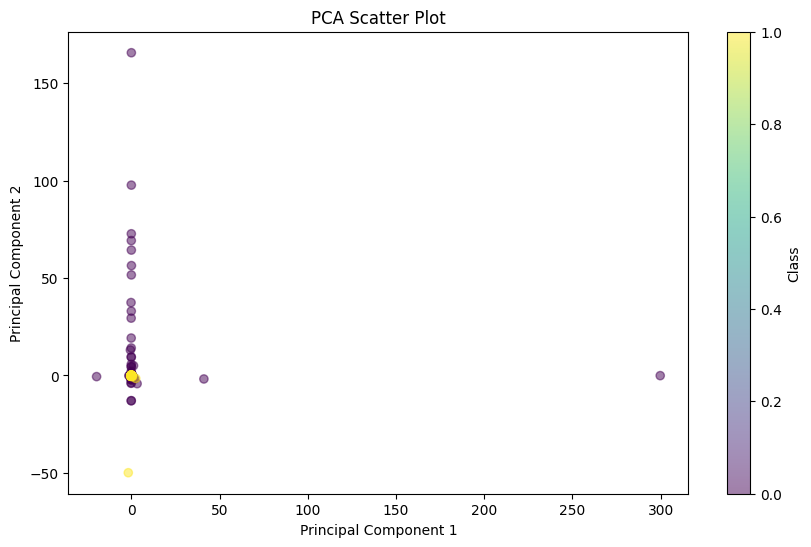

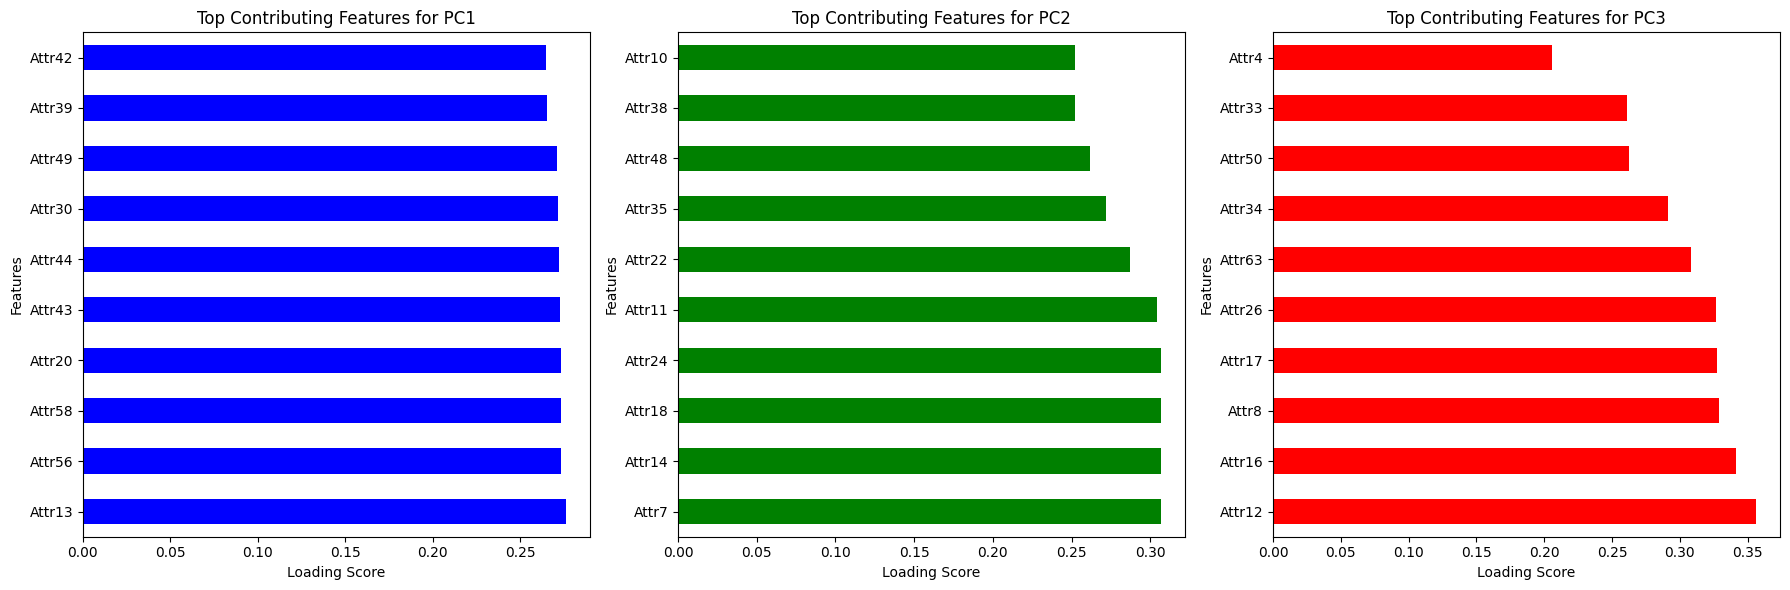

In [2]:
from scipy.io import arff
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import plotly.express as px
import sys


# Handle missing values
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df_1year), columns=df_1year.columns)

# Convert class variable to numeric format
df_imputed['class'] = df_imputed['class'].astype(int)

# Separate features and target variable
X = df_imputed.drop(columns=['class'])
y = df_imputed['class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Extract loadings (coefficients of the principal components)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=X.columns)

# Identify the top contributing features for PC1, PC2, and PC3
top_features_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(10)
top_features_pc2 = loadings['PC2'].abs().sort_values(ascending=False).head(10)
top_features_pc3 = loadings['PC3'].abs().sort_values(ascending=False).head(10)

print("Top contributing features for PC1:\n", top_features_pc1)
print("Top contributing features for PC2:\n", top_features_pc2)
print("Top contributing features for PC3:\n", top_features_pc3)

# 2D Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

# 3D Scatter Plot using Plotly
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['class'] = y

try:
    # This will check if the code is running in a Jupyter notebook
    #__IPYTHON__
    fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='class', title='3D PCA Scatter Plot')
    fig.show()
except NameError:
    # Use a different renderer for non-Jupyter environments
    fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='class', title='3D PCA Scatter Plot')
    fig.show(renderer='browser')

# Plot the top contributing features for PC1, PC2, and PC3
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

top_features_pc1.plot(kind='barh', ax=axes[0], color='blue')
axes[0].set_title('Top Contributing Features for PC1')
axes[0].set_xlabel('Loading Score')
axes[0].set_ylabel('Features')

top_features_pc2.plot(kind='barh', ax=axes[1], color='green')
axes[1].set_title('Top Contributing Features for PC2')
axes[1].set_xlabel('Loading Score')
axes[1].set_ylabel('Features')

top_features_pc3.plot(kind='barh', ax=axes[2], color='red')
axes[2].set_title('Top Contributing Features for PC3')
axes[2].set_xlabel('Loading Score')
axes[2].set_ylabel('Features')

plt.tight_layout()
plt.show()


Interpretation:

2D PCA Scatter Plot: This plot shows the distribution of the data points in the space defined by the first two principal components. Data points are colored by their class labels.
3D PCA Scatter Plot: This interactive plot created using Plotly visualizes the distribution in the space defined by the first three principal components.


Principal Components and Feature Contribution:

Principal Components (PC1, PC2, PC3): These are new axes that capture the maximum variance in the data. Each principal component is a linear combination of the original features.
Loadings: The coefficients of the original features in the principal components. Higher absolute values indicate a higher contribution of that feature to the component.

Top Contributing Features
PC1: Features like Attr13, Attr56, Attr58, Attr20, and Attr43 have high loadings, meaning they are important in defining PC1.
PC2: Features like Attr7, Attr14, Attr18, Attr24, and Attr11 have high loadings, making them significant for PC2.
PC3: Features like Attr12, Attr16, Attr8, Attr17, and Attr26 are the most influential in PC3.

*These features are the most important in explaining the variance in the data as captured by the principal components. They can be considered as key features for further analysis or modeling.

*Instead of using all original features, you can use the principal components (PC1, PC2, and PC3) as new features. This reduces the dimensionality of the dataset while retaining most of the variance.

*We can choose top contributing features based on their loadings for each principal component and those can be used for building models and we can also remove less contributing features to simplify the model. 


Explained Variance Ratio:
[0.20454366 0.14327866]
Cumulative Variance Explained:
[0.20454366 0.34782232]


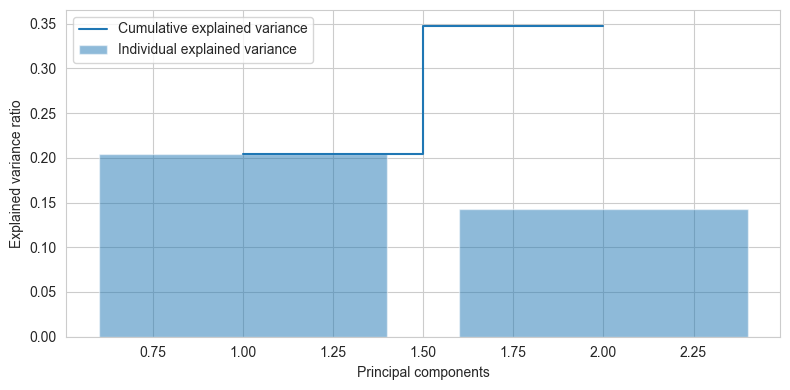

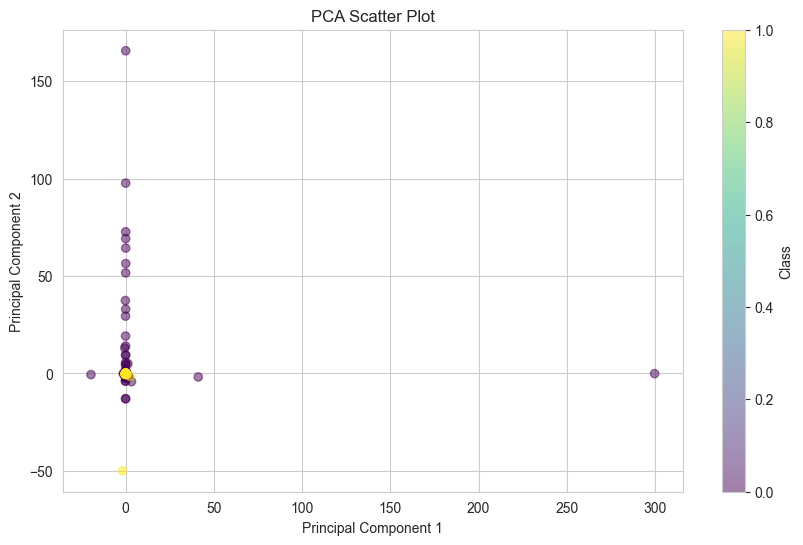

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Step 1: Load the dataset
# Assuming the dataset is already loaded into a DataFrame df

# Step 2: Preprocessing
# Handle missing values
imputer = SimpleImputer(strategy='median')  # Use median imputation
df_imputed = pd.DataFrame(imputer.fit_transform(df_1year), columns=df_1year.columns)

# Convert class variable to numeric format if necessary
df_imputed['class'] = df_imputed['class'].astype(int)  # Ensure it's in integer format

# Step 3: Standardization
# Separate features and target variable
X = df_imputed.drop(columns=['class'])  # Features
y = df_imputed['class']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Perform PCA
# Initialize PCA with desired number of components
pca = PCA(n_components=2)  # Retain 2 principal components for visualization

# Fit PCA to the standardized data and transform it
X_pca = pca.fit_transform(X_scaled)

# calculate using 3 components
#visulaize 3d using plotly, 3 components vs target variable
#used for visulaising target variable distribution


# Step 5: Explained Variance Ratio
# Analyze the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Analyze the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Calculate cumulative variance explained by the principal components
cumulative_variance = explained_variance_ratio.cumsum()
print("Cumulative Variance Explained:")
print(cumulative_variance)

# Optionally, you can plot the explained variance
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Step 6: Visualize Principal Components
# You can plot scatter plots or other visualizations to understand the relationships between features and principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

# Step 7: Feature Selection
# Select the top principal components or perform further analysis to identify important features
# You can use the transformed data X_pca as your new feature set


In [5]:
# Create a DataFrame to hold the loading scores for the principal components
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)

# Display the top contributing features for each component
#Display feature importances > 0.1
top_features_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head
top_features_pc2 = loadings['PC2'].abs().sort_values(ascending=False).head

print("Top contributing features for PC1:\n", top_features_pc1)
print("Top contributing features for PC2:\n", top_features_pc2)


Top contributing features for PC1:
 <bound method NDFrame.head of Attr13    0.276021
Attr56    0.273158
Attr58    0.273158
Attr20    0.273109
Attr43    0.272511
            ...   
Attr57    0.000033
Attr11    0.000026
Attr22    0.000022
Attr35    0.000012
Attr21    0.000008
Name: PC1, Length: 64, dtype: float64>
Top contributing features for PC2:
 <bound method NDFrame.head of Attr7     0.306704
Attr14    0.306704
Attr18    0.306704
Attr24    0.306530
Attr11    0.304426
            ...   
Attr58    0.000124
Attr56    0.000124
Attr20    0.000120
Attr57    0.000112
Attr13    0.000059
Name: PC2, Length: 64, dtype: float64>
